<a href="https://colab.research.google.com/github/VidhanV/ML_project/blob/main/ISRO_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd                                   #These are the set of libraries which are required to be imported in order to use different functions in the project.
import numpy as np
import re
import collections
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale =2.0)
from pathlib import Path
import xgboost as xgb
 
# Packages for data preparation
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
# Packages for modeling
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
!pip install --upgrade category_encoders
from category_encoders import BinaryEncoder                       

     |████████████████████████████████| 81kB 3.9MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


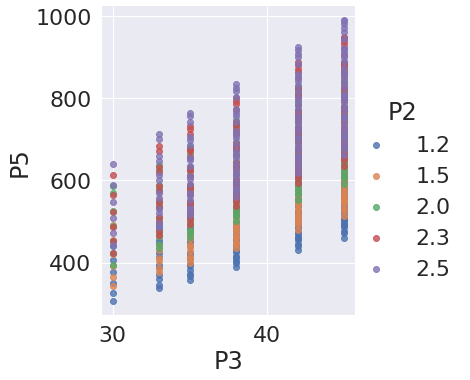

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ISRO project/Final_modal.csv') #This particular code is written to import the dataset file into the google colab and plot the graph baed on the data.
sns.lmplot("P3", "P5", df, hue="P2", fit_reg=False);

In [ ]:
bins=[0,550,1000] #binning used to classify all the values in table as 0 or 1 
group=[0,1]       # Two groups of 0 and 1 will be formed
df['new_column']=pd.cut(df['P5'],bins,labels=group) # It will identify the values to be classified as 0 or1 from column P3 and enter them in new_column

In [ ]:
df.head() #This line of code is used to display the table after executing the above lines of code

,P2,P3,P6,P7,P5,new_column
0,1.2,30,130,30,439.515783,0
1,1.2,33,130,30,483.271019,0
2,1.2,35,130,30,512.210385,0
3,1.2,38,130,30,555.411371,1
4,1.2,42,130,30,612.508528,1


In [ ]:
df.shape            #The below mentioned output gives us a preview of the dataset i.e. the number of rows and columns in the dataset

(630, 6)

In [ ]:
X=df.iloc[:,0:5] # This particular line of code helps in retrieving the data from columns 1-2 and store it in the variable x
y=df.iloc[:,5]   # This particular line of code helps in retrieving the data from columns 3 and store it in the variable y

In [ ]:
seed = 7 # This line of code is the value in the code from which the iteration starts.
test_size = 0.33 #This line of code mentions the size of the test dataset i.e. 33% of the total data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed) #This line of code indicates the interpreter to first form the train and test dataset and then split them accordingly

In [ ]:
model = XGBClassifier() #This line of code is used to let the programme know that the model will be implementing the XGBoost algorithm classifier.
model.fit(X_train, y_train) #This line of code is used to let the programme know which dataset needs to be fit in th model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
y_pred = model.predict(X_test) # The prediction which is made by the algorithm from X_test dataset is stored in the y_pred dataset.
predictions = [round(value) for value in y_pred] #All the values in the y_pred are rounded to get the required output in binary form i.e. as a Yes or No and stored in a variable named "predictions"
print(y_pred) #This code of line helps in getting us the main output of the model and helps us to decide which values to be used and which to be discarded.
#The values for which output is 1 can be accepted, and 0 means that the dimensions corresponding to that value cannot be used.

[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1
 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1
 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1]


In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0)) #This line of code helps us in determimng the output of the whole model which is made and the accuracy of the output result.

Accuracy: 100.00%


In [ ]:
# All the below mentioned lines of code is used to calculate the root mean square error of the model.
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, 
                max_depth = 5, alpha = 10, n_estimators = 10) 

In [ ]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[13:22:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.346035
